In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [211]:
def intialization(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)

    return (W,b)

In [212]:
def model(X,W,b):
    Z=X.dot(W) +b
    A=1/(1+np.exp(-Z))

    return A

In [213]:
def log_loss(A,y):
    epsilon=1e-15
    return 1 / len(y) * np.sum(-y*np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon))

In [214]:
def gradients(A,X,y):
    dW=1/len(y) * np.dot(X.T,A-y)
    db=1/len(y) * np.sum(A-y)

    return (dW,db)

In [215]:
def update(dW,db,W,b,learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db

    return (W,b)


In [216]:
def predict(X,W,b):

    A=model(X,W,b)
    return A > 0.5

In [217]:
from sklearn.metrics import accuracy_score

In [218]:
from tqdm import tqdm

In [219]:
def artificial_neuron(X_train,y_train,X_test,y_test,learning_rate=0.1,n_iter=100):
    
    ### parameter initialization

    W,b=intialization(X_train)

    train_Loss=[]
    train_acc=[]
    test_Loss=[]
    test_acc=[]


    for i in tqdm(range(n_iter)):
        A=model(X_train,W,b)
        if i%10==0:
            # ## train
            y_pred_train=predict(X_train,W,b)
            l_Loss_train=log_loss(A,y_train)
            train_Loss.append(l_Loss_train)
            train_acc.append(accuracy_score(y_train,y_pred_train))
            # ## test
            y_pred_test=predict(X_test,W,b)
            A_test=model(X_test,W,b)
            l_Loss_test=log_loss(A_test,y_test)
            test_Loss.append(l_Loss_test)
            test_acc.append(accuracy_score(y_test,y_pred_test))


        dW,db=gradients(A,X_train,y_train)

        W,b=update(dW,db,W,b,learning_rate)


       
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,2)
    plt.plot(train_Loss,label='train loss')
    plt.plot(test_Loss,label='test loss')
    plt.legend()
    plt.subplot(1,2,1)
    plt.plot(train_acc,label='train accuracy')
    plt.plot(test_acc,label='test accuracy')
    plt.legend()
    plt.show()

    return(W,b)


In [220]:
from utilities import *

In [221]:
X_train, y_train, X_test, y_test=load_data()

In [222]:
X_train_reshape=X_train.reshape(X_train.shape[0],-1)/X_train.max()
X_train_reshape.shape

(1000, 4096)

In [223]:
X_test_reshape=X_test.reshape(X_test.shape[0],-1)/X_train.max()
X_test_reshape.shape

(200, 4096)

C:\Users\tNouali\AppData\Roaming\Python\Python311\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


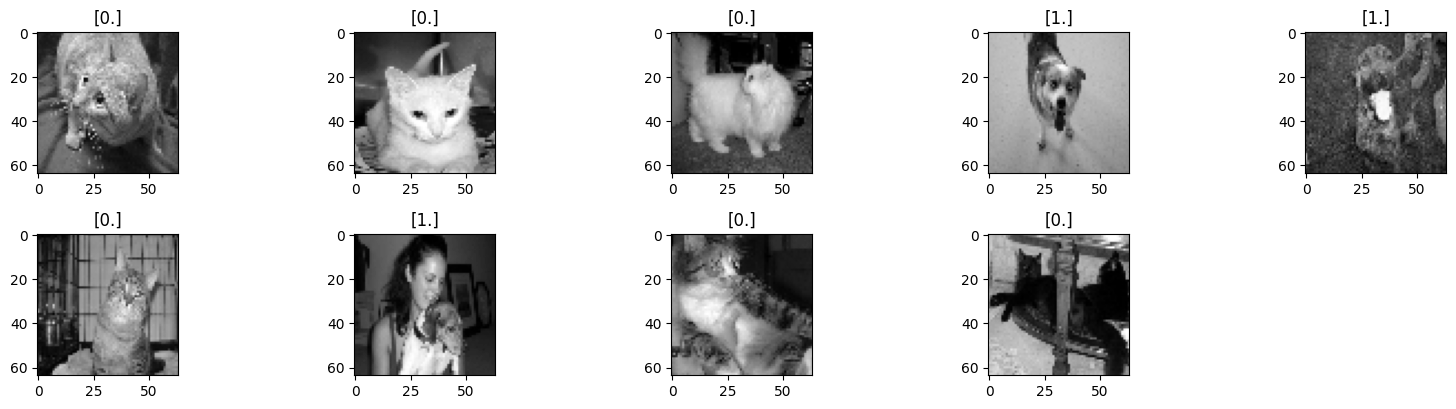

In [224]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

100%|██████████| 10000/10000 [00:58<00:00, 171.50it/s]


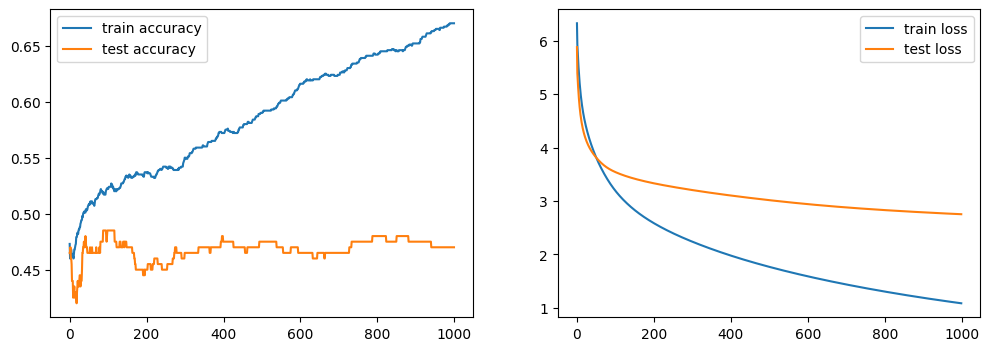

In [225]:
W,b=artificial_neuron(X_train_reshape,y_train,X_test_reshape,y_test,learning_rate=0.01,n_iter=10000)